In [ ]:
# Statistical and Machine Learning
# Unsupervised Learning - Homework Assignment
# Shabenoor Kamal

1,4
1,3
0,4
5,1
6,2
4,0


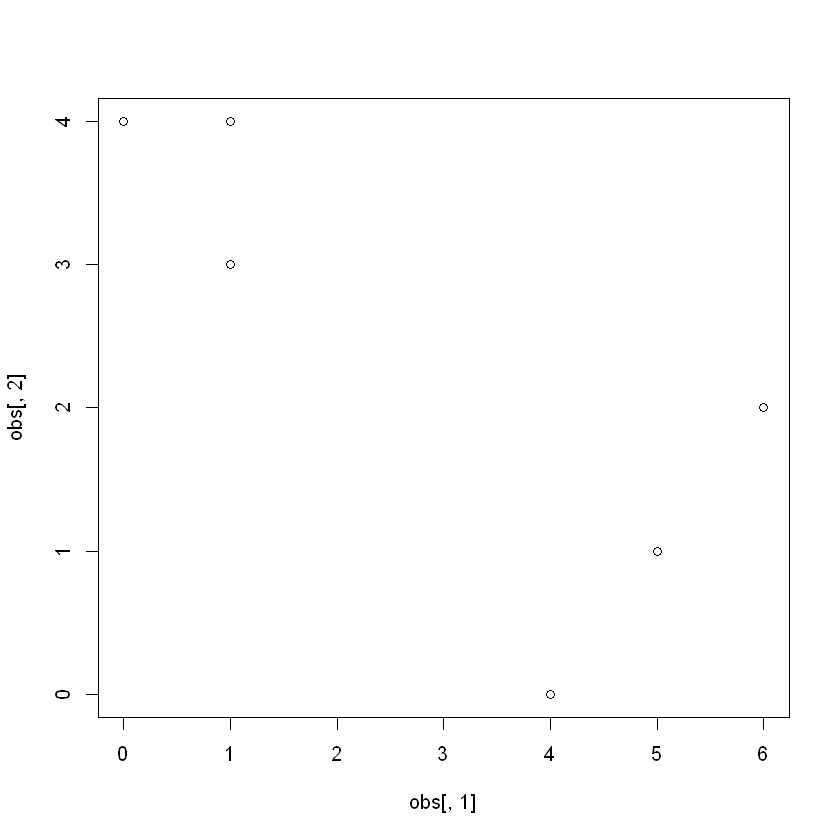

In [3]:
# Question 3 - Chapter 10

# plot the observations
obs = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
obs

plot(obs[,1], obs[,2])

In [4]:
# randomly assign a cluster label to each observation

clus_label = sample(2, nrow(obs), replace=T)
clus_label

[1] 1 1 2 1 1 2

In [6]:
# compute the centroid for each cluster 

centroid1 = c(mean(obs[clus_label==1, 1]), mean(obs[clus_label==1, 2]))
centroid2 = c(mean(obs[clus_label==2, 1]), mean(obs[clus_label==2, 2]))

In [7]:
centroid1

[1] 3.25 2.50

In [8]:
centroid2

[1] 2 2

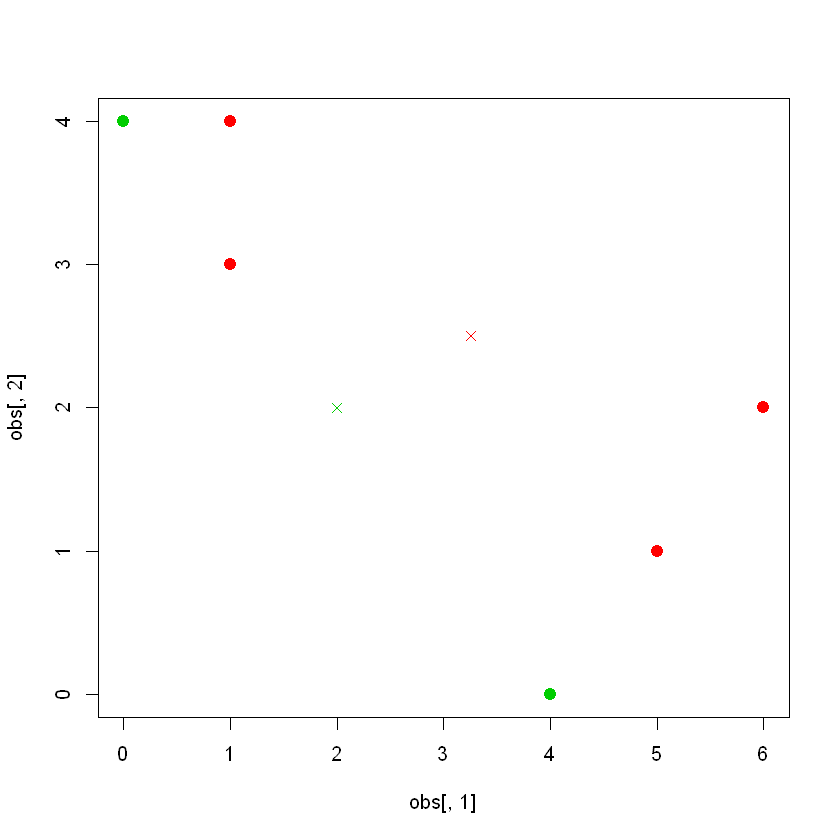

In [9]:
# plot the centroids

plot(obs[,1], obs[,2], col=(clus_label+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [11]:
# assign each observation to the closest centroid

euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(x, centroid1, centroid2) {
  labels = rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (euclid(x[i,], centroid1) < euclid(x[i,], centroid2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}

clus_label = assign_labels(obs, centroid1, centroid2)
clus_label

[1] 2 2 2 1 1 1

In [17]:
# repeat last two steps till the labels stop changing

last_labels = rep(-1, 6)
while (!all(last_labels == clus_label)) {
  last_labels = clus_label
  centroid1 = c(mean(obs[clus_label==1, 1]), mean(obs[clus_label==1, 2]))
  centroid2 = c(mean(obs[clus_label==2, 1]), mean(obs[clus_label==2, 2]))
  print(centroid1)
  print(centroid2)
  clus_label = assign_labels(obs, centroid1, centroid2)
}

clus_label

[1] 5 1
[1] 0.6666667 3.6666667


[1] 2 2 2 1 1 1

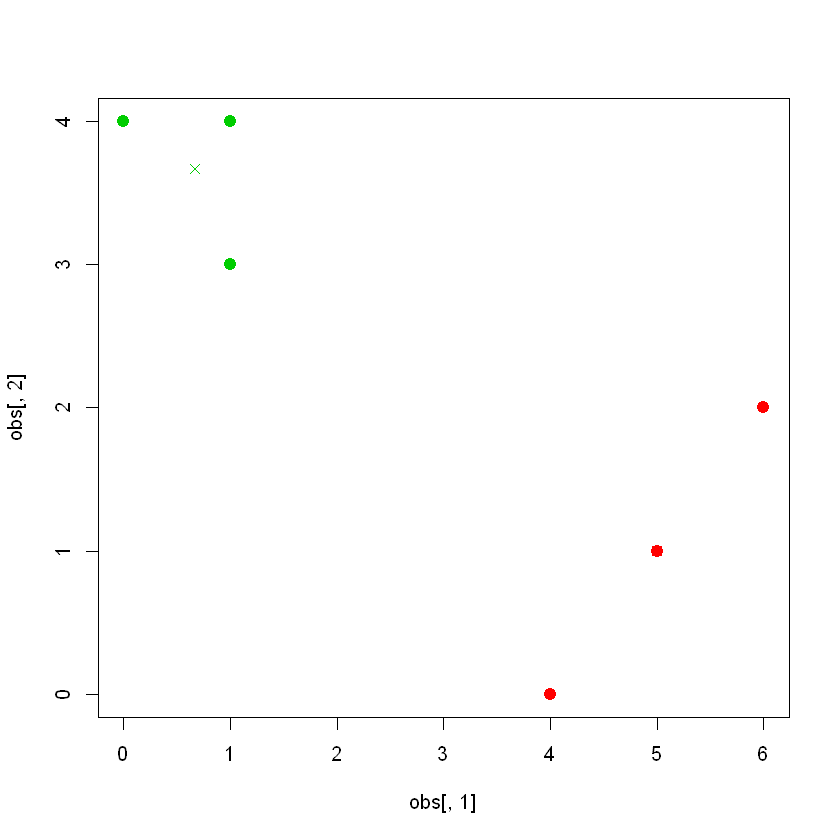

In [23]:
# plot the new cluster obs 

plot(obs[,1], obs[,2], col=(clus_label+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [24]:
# Question 8 - Chapter 10

library(ISLR)
set.seed(123)

# part a - calculate PVE using sdev output of prcomp() function

pr.out = prcomp(USArrests, center=T, scale=T)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve



Warning message:
"package 'ISLR' was built under R version 3.6.2"

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [25]:
# part b - calculate PVE by applying the equation

loadings = pr.out$rotation
pve2 = rep(NA, 4)
mean_cal = apply(USArrests, 2, mean)
sdev_cal = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, mean_cal, "-")
dsc = sweep(dsc, MARGIN=2, sdev_cal, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2



[1] 0.62006039 0.24744129 0.08914080 0.04335752

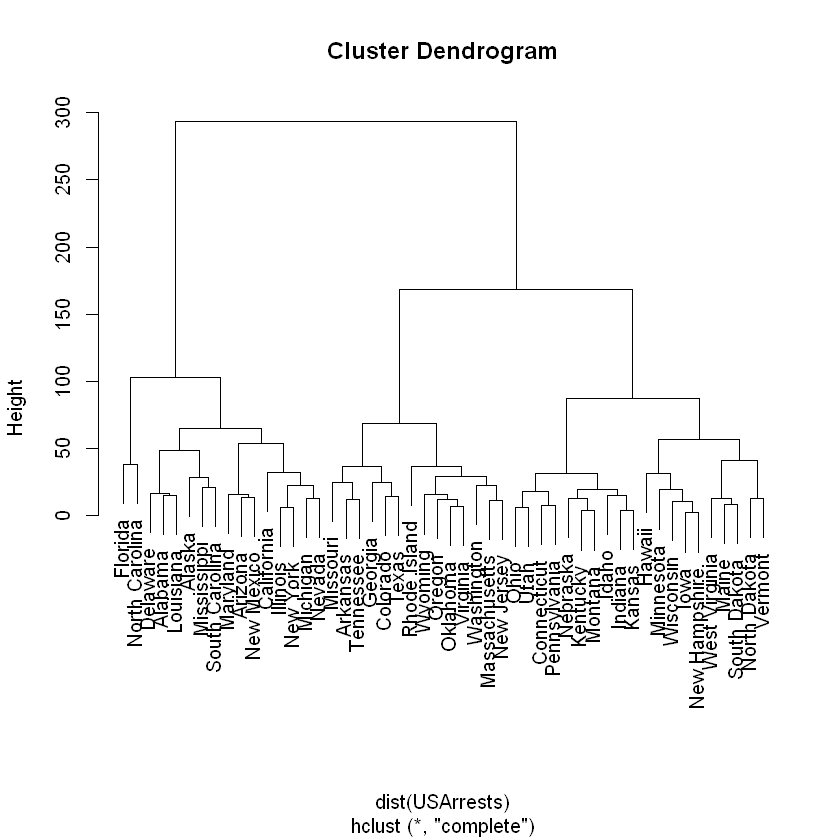

In [26]:
# Exercise 9 - Chapter 10

# part a - cluster states using hierarchal clustering, Euc distance and complete linkage

hier_clustering = hclust(dist(USArrests), method="complete")
plot(hier_clustering)

In [27]:
# part b

# cut dendogramto create three distinct clusters 

cutree(hier_clustering, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [28]:
# get the number of states in each cluster 
table(cutree(hier_clustering, 3))


 1  2  3 
16 14 20 

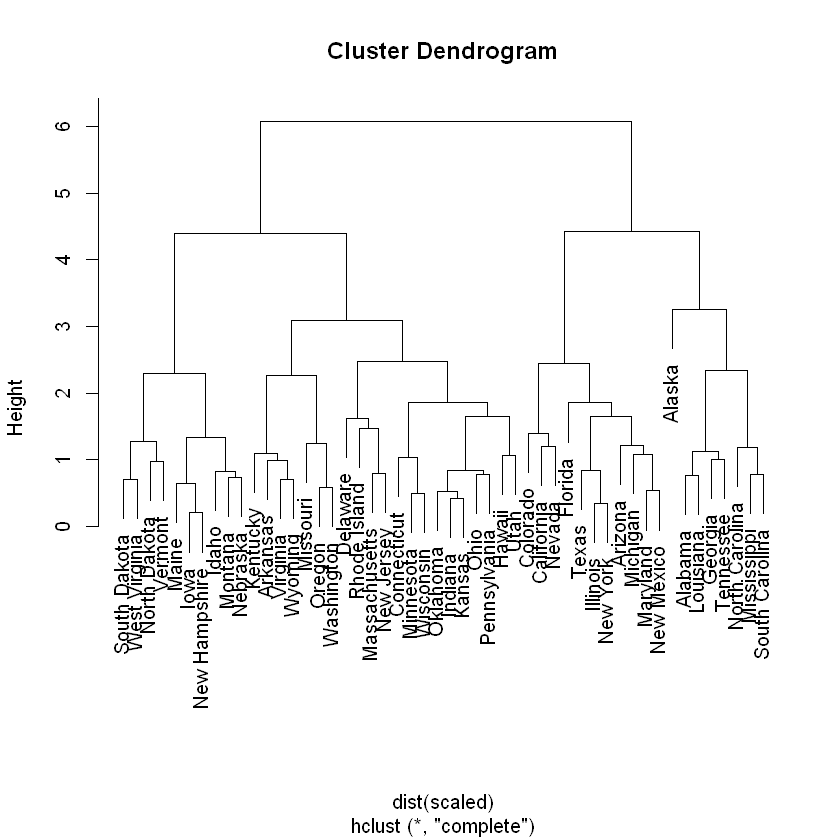

In [29]:
# part c

# hierarchal clustering after scaling variables to std dev of 1

scaled = scale(USArrests)
hier_scaled_clustering = hclust(dist(scaled), method="complete")
plot(hier_scaled_clustering)

In [30]:
# part d

# get three distinct clusters from the dendogram to compare results

cutree(hier_scaled_clustering, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [31]:
# compare results of both scaled and unscaled clustering 

table(cutree(hier_scaled_clustering, 3), cutree(hier_clustering, 3))

# Based on the results scaling the variabled has an effect on the clusters obtained from cutting the dendogram into 3 distinct clusters.
# For this data set the data should be standardized because the data measured has different units (UrbanPop compared to other three columns).

   
     1  2  3
  1  6  2  0
  2  9  2  0
  3  1 10 20

In [36]:
# Exercise 10 - Chapter 10

# part a - generate simulated dataset 

dataset = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
dataset[1:20, 2] = 1
dataset[21:40, 1] = 2
dataset[21:40, 2] = 2
dataset[41:60, 1] = 1

In [37]:
# part b - perform PCA, check for seperation in the three classes 

pca_output = prcomp(dataset)
summary(pca_output)



Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5822 0.001856 0.001761 0.001688 0.001605
Proportion of Variance 0.750 0.2500 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11    PC12
Standard deviation     0.001503 0.001454 0.001448 0.001365 0.001348 0.00132
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.99998
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     0.001287 0.001245 0.001196 0.001141 0.001124 0.001106
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999990 0.999990 0.999990 0.999990 0.999990
                           PC19     PC20     PC21      PC22      PC23     

In [39]:
pca_output$x[,1:2]

PC1,PC2
-0.7070912,-0.7074321913
-0.7072159,-0.7075559425
-0.7080086,-0.7083482918
-0.7074771,-0.7078193337
-0.7051452,-0.7054873943
-0.7070109,-0.7073507259
-0.7063384,-0.7066786335
-0.7071171,-0.7074591183
-0.7065533,-0.7068965301
-0.7070220,-0.7073619326


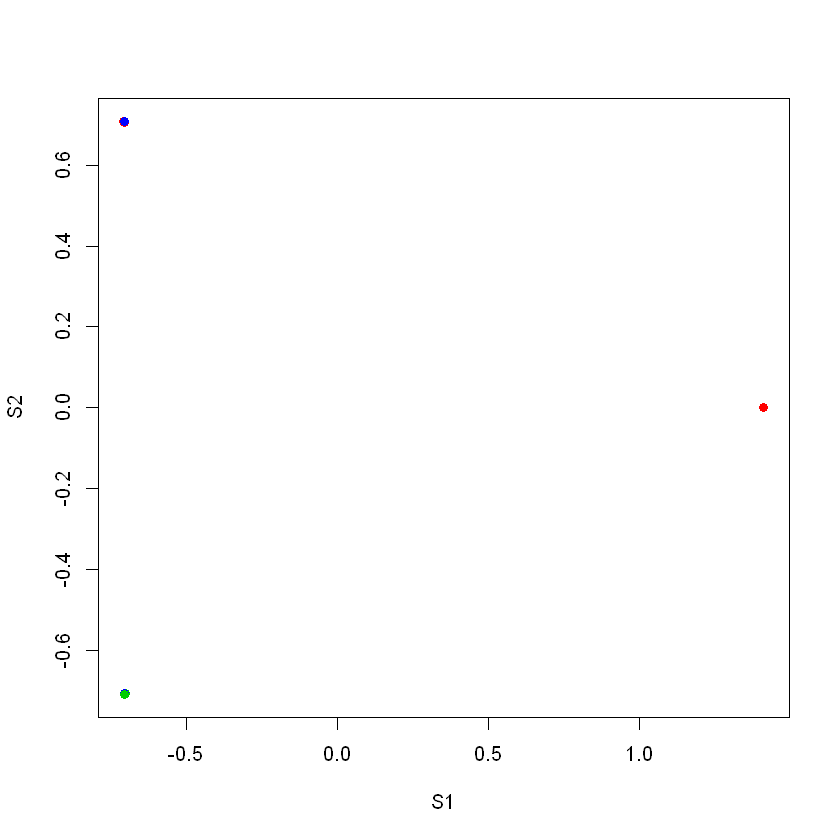

In [42]:
# plot the results - shows that the 3 classes are seperated in the first two PC score vectors

plot(pca_output$x[,1:2], col=2:4, xlab="S1", ylab="S2", pch=19) 

In [44]:
# part c - k-means clustering with k=3

kmeans_output = kmeans(dataset, 3, nstart=20)
table(kmeans_output$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

# from the results we can see that the clusters obtained from k-means clustering are a perfect match with the true class labels

   
     1  2  3
  1 20  0  0
  2  0 20  0
  3  0  0 20

In [45]:
# part d - k-means clustering with k=2

kmeans_output2 = kmeans(dataset, 2, nstart=20)
table(kmeans_output2$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

# the results from k=2 are not accurate as one entire class (class 3) has been absorbed into another class (class 1)

   
     1  2  3
  1 20  0 20
  2  0 20  0

In [46]:
# part e - k-means clustering with k=4

kmeans_output3 = kmeans(dataset, 4, nstart=20)
table(kmeans_output3$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

# in the results with k=4 one of the classes has been split into 2 classes with 8 and 12 observations each. The other 2 classes match correctly

   
     1  2  3
  1  0 20  0
  2  8  0  0
  3  0  0 20
  4 12  0  0

In [47]:
# part f - perform k-means clustering with k=3 on PC score vectors 

kmeans_output4 = kmeans(pca_output$x[,1:2], 3, nstart=20)
table(kmeans_output4$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

# from the results we can see that the clusters obtained from k-means clustering on PC score vectors are a perfect match with the true class labels

   
     1  2  3
  1 20  0  0
  2  0 20  0
  3  0  0 20

In [48]:
# part g - k-means clustering with k=3 and standardized data 

kmeans_output5 = kmeans(scale(dataset), 3, nstart=20)
table(kmeans_output5$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

# scaling results in poorer results compared to unscaled data - this is because the true distance between the observations is effected 

   
     1  2  3
  1  4  8  4
  2  4 10 10
  3 12  2  6